# Implementation of clustering algorithms

Build K-Means and Agglomerative Clustering models to perform an unsupervised clustering by using given data. Follow below steps as a guideline for building your model and explain each of them in code lines. 

* Data cleaning 

Start with data cleaning to ensure that your data is correct, consistent and usable. The techniques used for data cleaning may vary but you can consider to follow these basic steps: handling missing values, encoding categorical features, extracting useful features by using existing features, handling outliers etc.

* Data Preprocessing

In this step you should transform raw data into an understandable format for machine learning algorithms. This step may include scaling the features, performing dimensionality reduction etc.

* Clustering 

The goal of this step is to find distinct groups or “clusters” within a data set by using K-Means and Agglomerative Clustering Algorithms. Apply Elbow Method to determine the number of clusters. After building models, examine and comment the clusters formed via scatter plot.

* Silhouette Scores 

To evaluate how “well clustered” data points are, use the “silhouette score” and plot the Silhouette Scores for all of data points.

Note: Don't forget to explain your codes and comment on the obtained result.

In [71]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as shc
import warnings
warnings.simplefilter(action='ignore')
%matplotlib inline

In [72]:
df=pd.read_csv("dataset.csv")
display(df.head(5))
print("-*****************************************-")
display(df.shape)
print("-*****************************************-")
display(df.info)
print("-*****************************************-")
display(df.describe())
print("-*****************************************-")
display(df.isna().sum())
print("-*****************************************-")


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


-*****************************************-


(1338, 7)

-*****************************************-


<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

-*****************************************-


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


-*****************************************-


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

-*****************************************-


sex and smoker are binary values we need to change them to a numeric value 

also there is region value that takes 4 values we need to hot encode them

In [73]:
# also there is region value that takes 4 values we need to hot encode them

df.region.nunique()



4

In [74]:
df["sex"].replace(to_replace=["female","male"],value=[0,1],inplace=True)
df["smoker"].replace(to_replace=["yes","no"],value=[1,0],inplace=True)

display(df["sex"])
print("--------------------------")
display(df["smoker"])
print("--------------------------")

#ONE HOT ENCODING
df=pd.get_dummies(df)
df[["region_northeast","region_northwest","region_southeast","region_southwest"]]


0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64

--------------------------


0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

--------------------------


,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

<AxesSubplot: xlabel='age'>

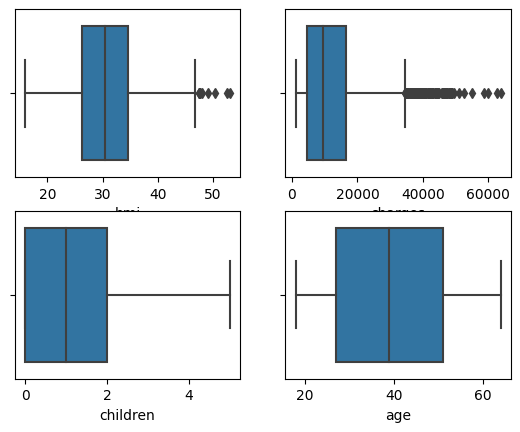

In [16]:
plt.subplot(2,2,1)
sns.boxplot(x=df["bmi"])

plt.subplot(2,2,2)
sns.boxplot(x=df["charges"])


plt.subplot(2,2,3)
sns.boxplot(x=df["children"])

plt.subplot(2,2,4)
sns.boxplot(x=df["age"])


#USING BOXPLOT CHECKING OUTLIERS



 there are outliers at bmi and charges values

In [17]:
df.drop(df[df["bmi"]>47].index,axis=0,inplace=True)
df.drop(df[df["charges"]>37500].index,axis=0,inplace=True)

#DROPPING OUTLIERS





In [24]:
scaler=StandardScaler()
value_df=df.values
scaled_df=scaler.fit_transform(value_df)

scaled_df=pd.DataFrame(scaled_df,columns=[
  'age','sex','bmi','children','smoker','charges'
  ,'region_northeast','region_northwest','region_southeast',
  'region_southwest'])


  

In [25]:
scaled_df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.396732,-0.983002,-0.374640,-0.888451,2.517008,0.756142,-0.569495,-0.579550,-0.587091,1.744392
1,-1.467639,1.017292,0.631409,-0.065811,-0.397297,-1.074868,-0.569495,-0.579550,1.703313,-0.573266
2,-0.758565,1.017292,0.499440,1.579468,-0.397297,-0.745864,-0.569495,-0.579550,1.703313,-0.573266
3,-0.404028,1.017292,-1.265001,-0.888451,-0.397297,1.372086,-0.569495,1.725478,-0.587091,-0.573266
4,-0.474935,1.017292,-0.206679,-0.888451,-0.397297,-0.816233,-0.569495,1.725478,-0.587091,-0.573266
...,...,...,...,...,...,...,...,...,...,...
1220,0.801399,1.017292,0.151522,1.579468,-0.397297,-0.002910,-0.569495,1.725478,-0.587091,-0.573266
1221,-1.467639,-0.983002,0.314341,-0.888451,-0.397297,-1.016840,1.755942,-0.579550,-0.587091,-0.573266
1222,-1.467639,-0.983002,1.159284,-0.888451,-0.397297,-1.086430,-0.569495,-0.579550,1.703313,-0.573266
1223,-1.254917,-0.983002,-0.734555,-0.888451,-0.397297,-1.040760,-0.569495,-0.579550,-0.587091,1.744392


so from now on we need to find best k value for clustering

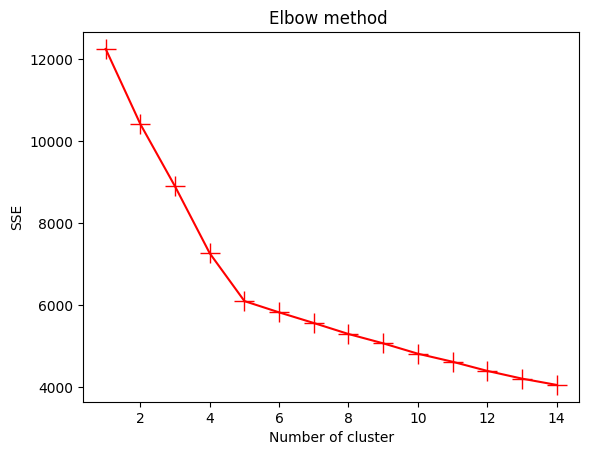

In [30]:
k_inertia = []

for i in range(1,15):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled_df)
    k_inertia.append(kmeans.inertia_)


plt.plot(range(1,15),k_inertia,marker="+",color="red",markersize=15)   

plt.title("Elbow method ")
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()




# IN HERE WE ARE DECIDING BEST K VALUES BY ELBOW METHOD

so best k value is 5 for us 

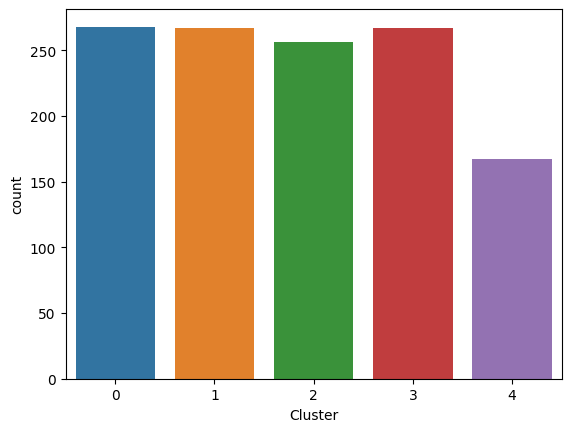

In [33]:
kmeans=KMeans(n_clusters=5,random_state=42)
predicts=kmeans.fit_predict(scaled_df)

scaled_df["Cluster"]=predicts

sns.countplot(x=scaled_df["Cluster"])
plt.show()

#IN HERE WE ARE LOOOKING AT CLUSTER VALUES

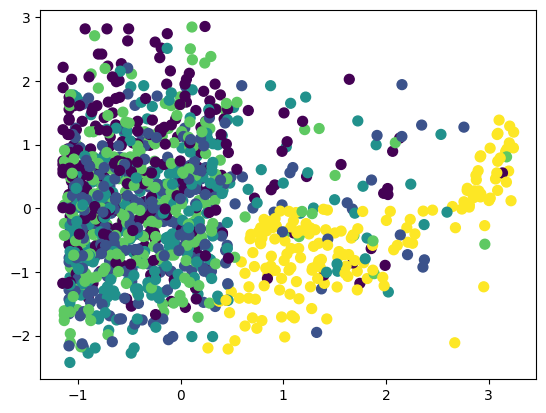

In [35]:
plt.scatter(scaled_df["charges"],scaled_df["bmi"],c=scaled_df["Cluster"],s=50)

In [39]:

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(scaled_df)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

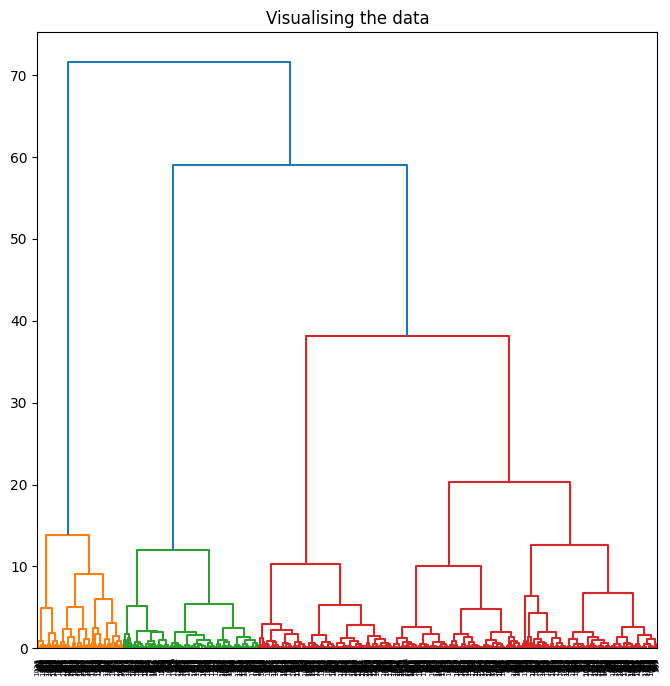

In [40]:
#IN HERE WE ARE VISUALIZING DATA BY DENDROGRAM


plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

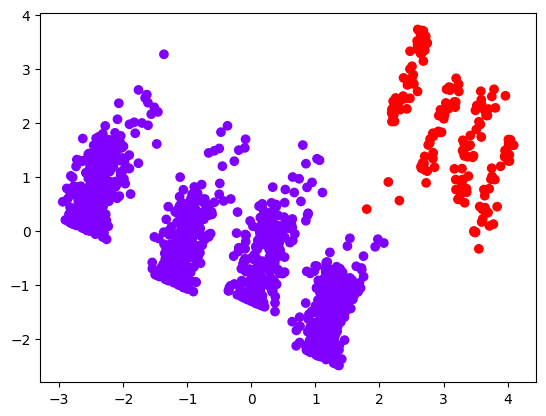

In [59]:
AC_model2 = AgglomerativeClustering(n_clusters = 2)
 
# Visualizing the clustering

plt.scatter(X_principal['P1'], X_principal['P2'],
           c = AC_model2.fit_predict(X_principal), cmap ='rainbow')


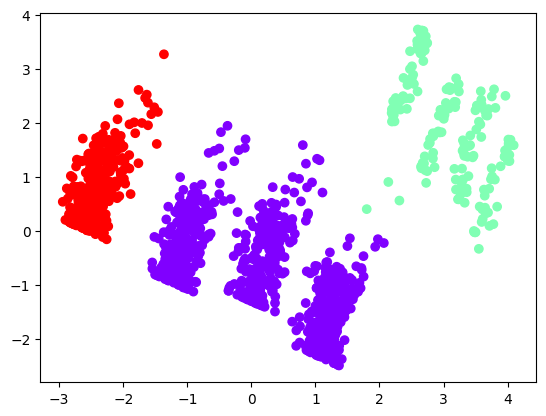

In [58]:
AC_model3 = AgglomerativeClustering(n_clusters = 3)

plt.scatter(X_principal['P1'], X_principal['P2'],
           c = AC_model3.fit_predict(X_principal), cmap ='rainbow')


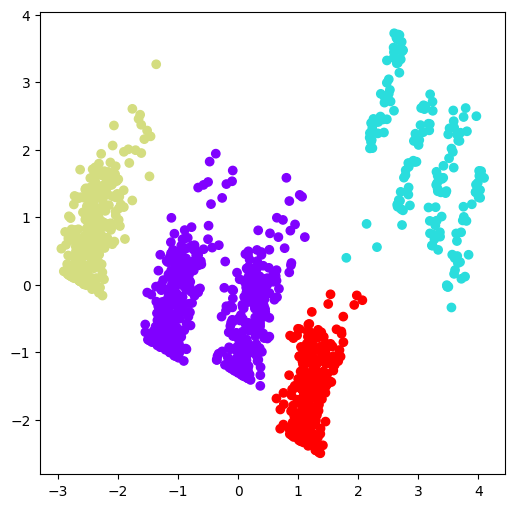

In [55]:
AC_model4 = AgglomerativeClustering(n_clusters = 4)
 
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = AC_model4.fit_predict(X_principal), cmap ='rainbow')




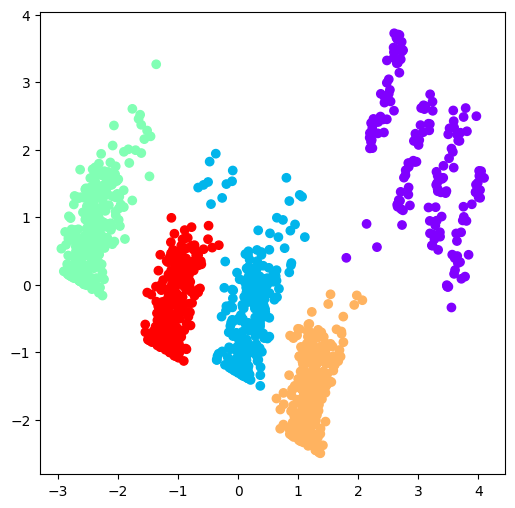

In [56]:
AC_model5 = AgglomerativeClustering(n_clusters = 5)
 
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = AC_model5.fit_predict(X_principal), cmap ='rainbow')


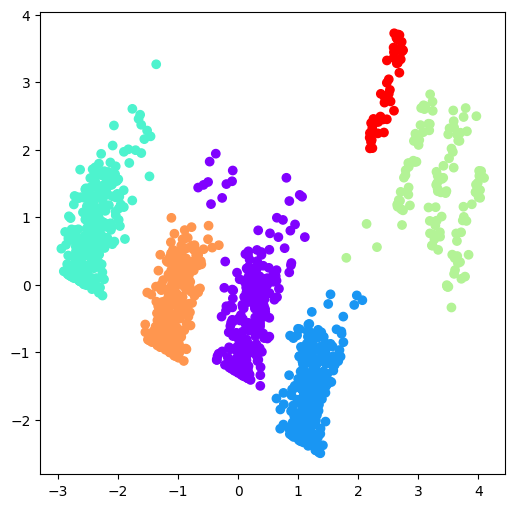

In [57]:
AC_model6 = AgglomerativeClustering(n_clusters = 6)
 
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = AC_model6.fit_predict(X_principal), cmap ='rainbow')




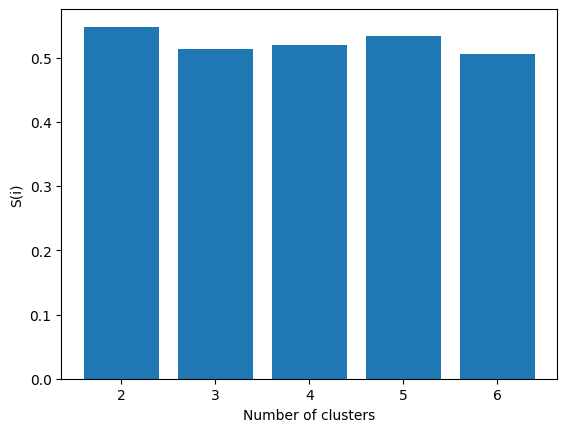

In [62]:
k = [2, 3, 4, 5, 6]
 
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X_principal, AC_model2.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, AC_model3.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, AC_model4.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, AC_model5.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, AC_model6.fit_predict(X_principal)))
 
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters',)
plt.ylabel('S(i)',)
plt.show()

K 2 IS BETTER FOR US

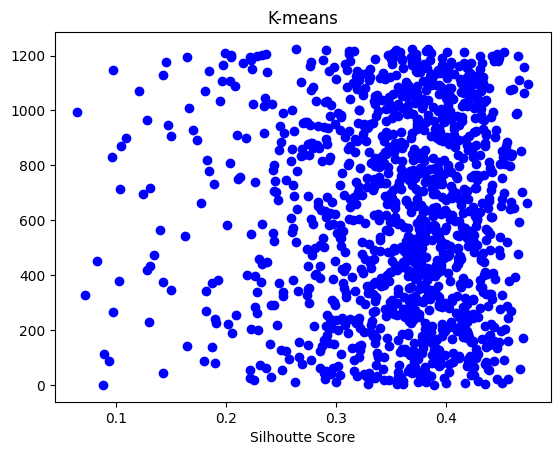

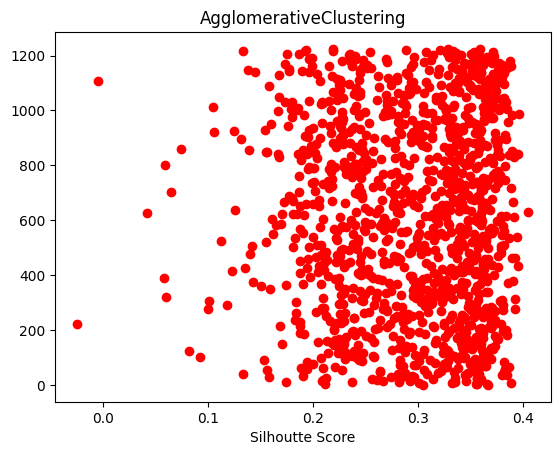

In [69]:
model_agg=AgglomerativeClustering(n_clusters=2,affinity="euclidean")
kmeans=KMeans(n_clusters=5,random_state=42)

label_k=kmeans.fit_predict(scaled_df)
label_agg=model_agg.fit_predict(scaled_df)

silhout_k=silhouette_samples(scaled_df,label_k)
silhout_agg=silhouette_samples(scaled_df,label_agg)


plt.scatter(silhout_k,range(len(silhout_k)),color="blue")
plt.xlabel("Silhoutte Score")
plt.title("K-means")
plt.show()

plt.scatter(silhout_agg,range(len(silhout_agg)),color="red")
plt.xlabel("Silhoutte Score")
plt.title("AgglomerativeClustering")
plt.show()





In [70]:
print("Mean silhoutte score in K-Means: " ,silhout_k .mean())
print("Mean silhoutte score in Agglomerative Clustering: " , silhout_agg.mean())

Mean silhoutte score in K-Means:  0.35395513045784976
Mean silhoutte score in Agglomerative Clustering:  0.29267956736714246


K-means is performing better because its silhoutte score is higher